In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/car_data.csv')
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,Gasolina,Revendedor,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Revendedor,Manual,0
2,ciaz,2017,7.25,9.85,6900,Gasolina,Revendedor,Manual,0
3,wagon r,2011,2.85,4.15,5200,Gasolina,Revendedor,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Revendedor,Manual,0


In [ ]:
df['tipo_transmissao'].replace({'Manual': 0, 'Automatico': 1}, inplace=True)
df['tipo_vendedor'].replace({'Revendedor': 0, 'Individual': 1}, inplace=True)
df['tipo_combustivel'].replace({'Gasolina': 0, 'Diesel': 1, 'GasNatural': 2}, inplace=True)
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


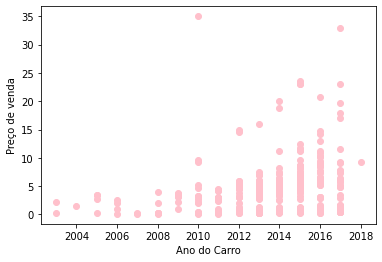

In [ ]:
plt.scatter(df['ano'], df['preco_venda'],  color='pink')
plt.xlabel("Ano do Carro")
plt.ylabel("Preço de venda")
plt.show()

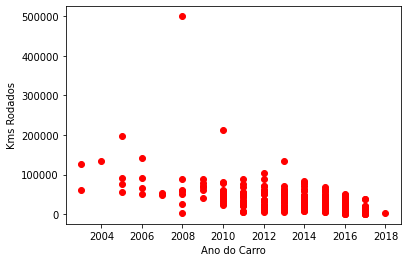

In [ ]:
plt.scatter(df['ano'], df['kms_rodados'],  color='red')
plt.xlabel("Ano do Carro")
plt.ylabel("Kms Rodados")
plt.show()

NOVAS VARIAVEIS

In [ ]:
new_x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]
new_y = df[['preco_venda']]

SEPARANDO EM TRINO E TESTE

In [ ]:
from sklearn.model_selection import train_test_split
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.2)

In [ ]:
print('TREINO')
print("new_x_train: ", new_x_train.shape)
print("new_y_train: ", new_y_train.shape)

print('\nTESTE')
print("new_x_test: ", new_x_test.shape)
print("new_y_test: ", new_y_test.shape)

TREINO
new_x_train:  (240, 4)
new_y_train:  (240, 1)

TESTE
new_x_test:  (61, 4)
new_y_test:  (61, 1)


TREINANDO O MODELO

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(new_x_train, new_y_train)

LinearRegression()

In [ ]:
y_prediction = model.predict(new_x_test)

In [ ]:
print(y_prediction.shape)
print(new_y_test.shape)

(61, 1)
(61, 1)


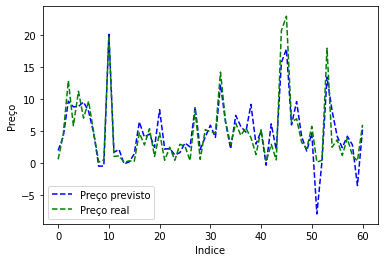

In [ ]:
plt.plot(range(y_prediction.shape[0]), y_prediction, 'b--')
plt.plot(range(new_y_test.shape[0]), new_y_test, 'g--')
plt.legend(['Preço previsto', 'Preço real'])
plt.ylabel('Preço')
plt.xlabel('Indice')
plt.show()

USANDO A MEDIDA R2

In [ ]:
from sklearn.metrics import r2_score
print('R2 - SCORE: ', r2_score(new_y_test, y_prediction))

R2 - SCORE:  0.8031027901952749
